# 1 无信息搜素

## 基本概念

### 状态

状态刻画了一个场景的所有变量. 状态空间是所有状态的集合. 搜索问题是要从开始状态到达目标(结尾)状态.

### 后继函数

每个状态可以通过一些动作进入另一个状态, 并有一定的代价 / 损耗.

### 搜索树

将每个状态看成节点, 将每个后继关系看成有向边, 这些共同构成一个有向无环图. 根节点是开始状态节点, 即形成一个树结构.

**一个状态节点只能在搜索树出现一次**

注: 如果状态存在循环, 可以通过引入时间变量来防止形成有环图, 但是树无限大.

In [1]:
from random import sample
class Node:
    def __init__(self, name = ''):
        self.name = name
        self.children = []
    def __str__(self):
        return self.name
    def AppendChild(self, node):
        self.children.append(node)

def ConstructGraph(edges):
    """Construct an acyclic, directed graph with given edges and node names"""
    nodes = set()
    for edge in edges:
        for name in edge:
            nodes.add(name)
    nodes = dict((name, Node(name)) for name in nodes)
    for edge in edges:
        nodes[edge[0]].AppendChild(nodes[edge[1]])
    return nodes
        
edges = ['sd','de','db','dc','ba','ca','fc','fg','rf','er','eh','hq','hp','pq','sp','se']
edges = sample(edges, len(edges)) # random permutation
graph = ConstructGraph(edges)

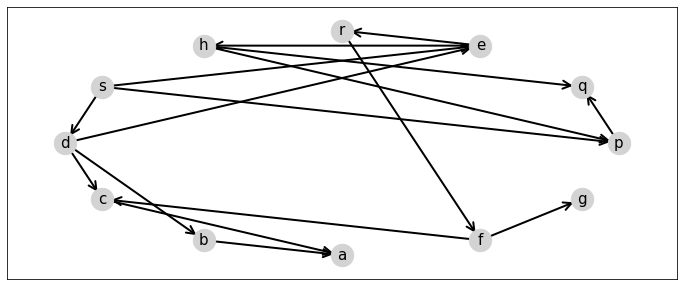

In [2]:
import networkx as nx
from matplotlib import pyplot as plt 

def NXGraph(edges):
    G = nx.DiGraph()
    for nodes in edges:
        G.add_edge(nodes[0], nodes[1])
        
    pos = nx.shell_layout(G) 
    # weight = nx.get_edge_attributes(G, "weight")

    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightgray')
    nx.draw_networkx_edges(G, pos, width=2, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=15, font_color='black')
    # nx.draw_networkx_edge_labels(G, pos, weight)
    plt.show()
    return G 
    
edges = ['sd','de','db','dc','ba','ca','fc','fg','rf','er','eh','hq','hp','pq','sp','se']
edges = sample(edges, len(edges)) # random permutation
plt.figure(figsize = (12, 5))
NXGraph(edges)

## 搜索算法概念

### 过程
* 搜索开始: 从搜索树的根节点开始
* 节点扩展: 访问一个**未访问**但是**已发现**的节点
* 节点生成: **发现**新的节点
* 目标测试: 判断当且节点对应的状态是不是目标状态 (游戏胜利)

### 实现模块
* 搜索边缘: (frontier / fringe) 已经**发现**但是**未访问**的所有节点
* 节点扩展: **访问**一个节点, 并枚举它的邻居节点
* 节点发现: 将节点扩展中的新节点加入搜索边缘
* <font color=red>搜索策略</font>: 在搜索边缘中确定下一个要**访问**的节点的策略

"生成" (generate) 与 "发现" (discover) 是同义词. 而 "访问" (visit) 与 "扩展" (expand) 是同义词。这两对同义词可能会在下文中使用.

### 搜索算法评价

搜索算法会生成搜索树 (数据结构的树结构). 用 $b$ 表示分支因子, 即每一个节点的相邻 (后继) 节点数量. $m$ 表示搜索树的深度 (层数) 减一. $s$ 为目标状态的节点.

搜索树的根节点只有 $1$ 个节点, 但该根节点可以衍生出 $b$ 个节点, 继而这 $b$ 个节点每个衍生出 $b$ 个节点... 总共节点数量为
$$1+b+\dotsc+b^m = \frac{b^{m+1}-1}{b-1} = O(b^m)$$

* 完备性: 如果存在目标节点, 理论上是否一定能搜索到?
* 最优性: 最先找到的目标节点是不是损耗最小的?
* 时间复杂度: 用总共搜索节点数衡量.
* 空间复杂度: 一般用搜索边缘的大小衡量. 因为要保存搜索边缘.

## 搜索算法

### 深度优先搜索 

深度优先搜索 (Depth-First Search, DFS) 的策略: 每次选择搜索树深度最大的未被访问的节点, 将其扩展.

DFS 不完备, 如果有环可能卡死在环上或树高无限的分支.

DFS 并非最优, 它常常一条路吊死.

最劣情况下, DFS 生成节点个数可以达到 $O(b^m)$.

搜索边缘需保存每层正在查找的节点发现的后继 $b$ 个节点, 空间复杂度为 $O(bm)$.


In [3]:
def DFS(node: Node, aim, depth = 1, maxdepth = 100):
    if depth > maxdepth:
        return False
    print('-> %s(%d) '%(node, depth), end = '')
    if node.name == aim:
        return True 
    for child in node.children: # frontier
        if DFS(child, aim, depth + 1, maxdepth):
            return True 
    return False

DFS(graph['s'], aim = 'g')    

-> s(1) -> p(2) -> q(3) -> e(2) -> r(3) -> f(4) -> g(5) 

True

### 广度优先搜索

广度优先搜索 (Breadth-First Search, BFS) 的策略: 每次选择搜索树深度最小的未被访问的节点, 将其扩展. 这样刚好相当于按层搜索.


BFS 是完备且最优的.

BFS 生成节点个数是 $O(b^m)$.

由于最新一层每个节点都有 $b$ 个后继节点, 空间复杂度是 $O(b^{m+1})$.

In [4]:
def BFS(node: Node, aim):
    tree = [(node, 1)]
    while len(tree) > 0:
        node, depth = tree.pop(0)
        print('-> %s(%d) '%(node, depth), end = '')
        if node.name == aim:
            break 
        for child in node.children:
            tree.append((child, depth + 1))
        
BFS(graph['s'], aim = 'g')

-> s(1) -> p(2) -> e(2) -> d(2) -> q(3) -> r(3) -> h(3) -> b(3) -> c(3) -> e(3) -> f(4) -> p(4) -> q(4) -> a(4) -> a(4) -> r(4) -> h(4) -> g(5) 

### 迭代加深算法

迭代加深算法 (Iterative Deepening Search, IDS): 先设定最大深度为 $1$, 使用深度优先搜索. 再设定深度为 $2$, 使用深度优先搜索. 再设定深度为 $3$, 使用深度优先搜索...

生成节点个数 $O(b^m)$, 搜索边缘大小 $O(bm)$.

注: 生成节点个数实际为 
$b+(b+b^2)+(b+b^2+b^3)+\dotsc = O(b^{m+1})$.

In [5]:
def LDS(node: Node, aim, maxdepth = 100):
    for depth in range(1, maxdepth):
        print('Depth %d'%depth, end = ' ')
        if DFS(node, aim, maxdepth = depth):
            break 
        print('')

LDS(graph['s'], aim = 'g')

Depth 1 -> s(1) 
Depth 2 -> s(1) -> p(2) -> e(2) -> d(2) 
Depth 3 -> s(1) -> p(2) -> q(3) -> e(2) -> r(3) -> h(3) -> d(2) -> b(3) -> c(3) -> e(3) 
Depth 4 -> s(1) -> p(2) -> q(3) -> e(2) -> r(3) -> f(4) -> h(3) -> p(4) -> q(4) -> d(2) -> b(3) -> a(4) -> c(3) -> a(4) -> e(3) -> r(4) -> h(4) 
Depth 5 -> s(1) -> p(2) -> q(3) -> e(2) -> r(3) -> f(4) -> g(5) 

### 一致代价搜索 

一致代价搜索 (Uniform Cost Search, UCS): 每次选择代价最小的节点扩展. 代价是一个自定义的函数. 例如广度优先搜索是一致代价搜索的特例, 其代价 $=$ 节点深度. 深度优先搜索也可以是一致代价搜索的特例, 其代价 $= -$ 节点深度.

UCS 是完备且最优的. 时间复杂度和空间复杂度由目标节点的代价决定, 相当于代价函数的等高线才是深度.